In [78]:
'''
Homework 2
Spring 2023
'''

'\nYuanyuan Sun (A20487775)\nHomework 2\nSpring 2023\n'

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

adult_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(adult_data_url, header=None)

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                'hours_per_week', 'native_country', 'income']

df.columns = column_names
#df.head()
total = len(df)
total

32561

In [80]:
# Check the frequency on education
edu_fre = df['education'].value_counts()
edu_fre

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [81]:
# Generate required results for the query over the original dataset.

'''
================================== 1 ===============================================
note: the description does not mention how we can generate the required results. There are at least two ways:
way 1. get the required results by head() 1-1000
way 2. get the required results by sample() 1000 
Here, I choose to generate data by way2
'''

# Generate 1,000 results for the query(the most frequent “Education” result) over the original dataset
df00_1k = df.sample(n=1000, random_state=40)
print('Length of the original data set with 1000 results, df00_1k size ==', len(df00_1k))

# Generate 4,000 results for the query(the most frequent “Education” result) over the original dataset
df00_4k = df.sample(n=4000, random_state=40)
print('Length of the original data set with 1000 results, df00_4k size ==', len(df00_4k))

Length of the original data set with 1000 results, df00_1k size == 1000
Length of the original data set with 1000 results, df00_4k size == 4000


In [82]:
'''
Here are 3 other data sets code. 
Note: the description does not mention whether or not we do data processing based on original data set, 
by default, I do data processing based on original data set
'''

'''
******************************** Data Proccessing ********************************
df01: removing a record with the most frequent “Education”

The condition means we need to remove one record with the most frequent “Education”. Since we clearly know that the most 
frequent “Education” is with many records, then we can just pick one record with the most frequent “Education”. 

Simply, I get the first index corresponding to the most most frequent “Education” level, then remove a record with the most 
frequent “Education” as the question description requires.
'''

# ************** df01: Removing a record with the most frequent “Education”  ************
most_fre_level = df['education'].value_counts().idxmax()
most_fre_num = df['education'].value_counts().max()
print('* The value corresponding to most frequency in the original dataset is', most_fre_level)
print('* The amount corresponding to most frequency in the original dataset is', most_fre_num)

# get the first index corresponding to the most frequent education level
first_index = df.index[df['education'] == most_fre_level].min()
first_index
print('* The first index corresponding to the most most frequent “Education” level == ', first_index)
print('* Check the length of the original data frame: the length should be 32561 ==', len(df))

# remove a record with the most frequent “Education”
df01 = df.drop(index = first_index)
print('* After remove a record with the most frequent “Education”, check the length of df01: the length should be 32560 ==', len(df01))
# Now, I get the data set that removing a record with the most frequent “Education”
print('* Now, I get the data set that removing a record with the most frequent “Education which is df01”')

* The value corresponding to most frequency in the original dataset is  HS-grad
* The amount corresponding to most frequency in the original dataset is 10501
* The first index corresponding to the most most frequent “Education” level ==  2
* Check the length of the original data frame: the length should be 32561 == 32561
* After remove a record with the most frequent “Education”, check the length of df01: the length should be 32560 == 32560
* Now, I get the data set that removing a record with the most frequent “Education which is df01”


In [83]:


# ************** df02: removing any record with the second most frequent “Education”  ************

# get the levol of the second most frequent “Education” in the original data set
sec_most_fre_level =  df['education'].value_counts().index[1]
print('* The second most frequent Education level in the original dataset is', sec_most_fre_level)

df02 = df[df['education'] != sec_most_fre_level]
print('* Now, I get the data set that removing any record with the second most frequent “Education” which is df02”')

* The second most frequent Education level in the original dataset is  Some-college
* Now, I get the data set that removing any record with the second most frequent “Education” which is df02”


In [84]:
 

# ************** df03: removing any record with the least frequent “Education”  ************

# find the least frequent education level
least_frequent_level = df['education'].value_counts().index[-1]
print('* The least frequent education level is', least_frequent_level)

df03 = df[df['education'] != least_frequent_level]
print('* Now, I get the data set that removing any record with the least frequent “Education” which is df03”')

* The least frequent education level is  Preschool
* Now, I get the data set that removing any record with the least frequent “Education” which is df03”


In [85]:
# generate 1,000 results for the query over each of three datasets
df01_1k = df01.sample(n=1000, random_state=40)
print('Length of df01 ==', len(df01_1k))

df02_1k = df02.sample(n=1000, random_state=40)
print('Length of df02 ==', len(df02_1k))

df03_1k = df03.sample(n=1000, random_state=40)
print('Length of df03 ==', len(df03_1k))

Length of df01 == 1000
Length of df02 == 1000
Length of df03 == 1000


In [86]:
# generate 1,000 results for the query over each of three datasets
df01_4k = df01.sample(n=4000, random_state=40)
print('Length of df01 ==', len(df01_4k))

df02_4k = df02.sample(n=4000, random_state=40)
print('Length of df02 ==', len(df02_4k))

df03_4k = df03.sample(n=4000, random_state=40)
print('Length of df03 ==', len(df03_4k))

Length of df01 == 4000
Length of df02 == 4000
Length of df03 == 4000


In [87]:
''' Query the most frequent “Education” result in the four data sets on 4 datasets with different data size'''

# Get the most frequent “Education” result on the 4 data sets which each data size is 1000
print('Check the most frequency levels and frequency when data size is 1000k which are true answers', '\n')
most_fre_level_df00_1k = df00_1k['education'].value_counts().idxmax()
most_fre_level_df01_1k = df01_1k['education'].value_counts().idxmax()
most_fre_level_df02_1k = df02_1k['education'].value_counts().idxmax()
most_fre_level_df03_1k = df03_1k['education'].value_counts().idxmax()
most_fre_levels_list_1k = [most_fre_level_df00_1k, most_fre_level_df01_1k, most_fre_level_df02_1k, most_fre_level_df03_1k]
print('* With 1000 size, get the most frequent “Education” result on the 4 data sets: ', most_fre_levels_list_1k)

most_fre_num_df00_1k = df00_1k['education'].value_counts().max()
most_fre_num_df01_1k = df01_1k['education'].value_counts().max()
most_fre_num_df02_1k = df02_1k['education'].value_counts().max()
most_fre_num_df03_1k = df03_1k['education'].value_counts().max()
most_fre_num_list_1k = [most_fre_num_df00_1k, most_fre_num_df01_1k, most_fre_num_df02_1k, most_fre_num_df03_1k]
print('* With 1000 size, get the frequency of most frequent “Education” result on the 4 data sets: ', most_fre_num_list_1k, '\n')


# Get the most frequent “Education” result on the 4 data sets which each data size is 4000
print('Check the most frequency levels and frequency when data size is 1000k which are true answers', '\n')
most_fre_level_df00_4k = df00_4k['education'].value_counts().idxmax()
most_fre_level_df01_4k = df01_4k['education'].value_counts().idxmax()
most_fre_level_df02_4k = df02_4k['education'].value_counts().idxmax()
most_fre_level_df03_4k = df03_4k['education'].value_counts().idxmax()
most_fre_levels_list_4k = [most_fre_level_df00_4k, most_fre_level_df01_4k, most_fre_level_df02_4k, most_fre_level_df03_4k]
print('* With 4000 size, get the most frequent “Education” result on the 4 data sets: ', most_fre_levels_list_4k)

most_fre_num_df00_4k = df00_4k['education'].value_counts().max()
most_fre_num_df01_4k = df01_4k['education'].value_counts().max()
most_fre_num_df02_4k = df02_4k['education'].value_counts().max()
most_fre_num_df03_4k = df03_4k['education'].value_counts().max()
most_fre_num_list_4k = [most_fre_num_df00_4k, most_fre_num_df01_4k, most_fre_num_df02_4k, most_fre_num_df03_4k]
print('* With 4000 size, get the frequency of most frequent “Education” result on the 4 data sets: ', most_fre_num_list_4k)

Check the most frequency levels and frequency when data size is 1000k which are true answers 

* With 1000 size, get the most frequent “Education” result on the 4 data sets:  [' HS-grad', ' HS-grad', ' HS-grad', ' HS-grad']
* With 1000 size, get the frequency of most frequent “Education” result on the 4 data sets:  [315, 362, 427, 323] 

Check the most frequency levels and frequency when data size is 1000k which are true answers 

* With 4000 size, get the most frequent “Education” result on the 4 data sets:  [' HS-grad', ' HS-grad', ' HS-grad', ' HS-grad']
* With 4000 size, get the frequency of most frequent “Education” result on the 4 data sets:  [1279, 1307, 1735, 1274]


In [88]:
# Get options in each data set
options_df01_1k = df01_1k['education'].unique()
print('* Length of df01_1k ==', len(df01_1k), '\n')
print('* Options of df01_1k:', options_df01_1k)
print('------------------------------------------------')

options_df02_1k = df02_1k['education'].unique()
print('* Length of df02_1k ==', len(df02_1k), '\n')
print('* Options of df02_1k:', options_df02_1k)
print('------------------------------------------------')

options_df03_1k = df03_1k['education'].unique()
print('* Length of df03_1k ==', len(df03_1k), '\n')
print('* Options of df03_1k:', options_df03_1k)
print('------------------------------------------------')


* Length of df01_1k == 1000 

* Options of df01_1k: [' HS-grad' ' Assoc-acdm' ' Some-college' ' Bachelors' ' Masters'
 ' Doctorate' ' Assoc-voc' ' 7th-8th' ' 12th' ' 11th' ' Prof-school'
 ' 5th-6th' ' 9th' ' 10th' ' Preschool' ' 1st-4th']
------------------------------------------------
* Length of df02_1k == 1000 

* Options of df02_1k: [' Bachelors' ' HS-grad' ' 7th-8th' ' 11th' ' 10th' ' Assoc-voc'
 ' 5th-6th' ' Prof-school' ' Masters' ' Doctorate' ' 12th' ' Assoc-acdm'
 ' 9th' ' 1st-4th' ' Preschool']
------------------------------------------------
* Length of df03_1k == 1000 

* Options of df03_1k: [' HS-grad' ' Bachelors' ' Some-college' ' 11th' ' Assoc-voc' ' 5th-6th'
 ' Prof-school' ' Assoc-acdm' ' Doctorate' ' 10th' ' 9th' ' Masters'
 ' 12th' ' 7th-8th' ' 1st-4th']
------------------------------------------------


In [89]:
# Get options in each data set
options_df01_4k = df01_4k['education'].unique()
print('* Length of df01_4k ==', len(df01_4k), '\n')
print('* Options of df01_4k:', options_df01_4k)
print('------------------------------------------------')

options_df02_4k = df02_4k['education'].unique()
print('* Length of df02_4k ==', len(df02_4k), '\n')
print('* Options of df02_4k:', options_df02_4k)
print('------------------------------------------------')

options_df03_4k = df03_4k['education'].unique()
print('* Length of df03_4k ==', len(df03_4k), '\n')
print('* Options of df03_4k:', options_df03_4k)
print('------------------------------------------------')

* Length of df01_4k == 4000 

* Options of df01_4k: [' HS-grad' ' Assoc-acdm' ' Some-college' ' Bachelors' ' Masters'
 ' Doctorate' ' Assoc-voc' ' 7th-8th' ' 12th' ' 11th' ' Prof-school'
 ' 5th-6th' ' 9th' ' 10th' ' Preschool' ' 1st-4th']
------------------------------------------------
* Length of df02_4k == 4000 

* Options of df02_4k: [' Bachelors' ' HS-grad' ' 7th-8th' ' 11th' ' 10th' ' Assoc-voc'
 ' 5th-6th' ' Prof-school' ' Masters' ' Doctorate' ' 12th' ' Assoc-acdm'
 ' 9th' ' 1st-4th' ' Preschool']
------------------------------------------------
* Length of df03_4k == 4000 

* Options of df03_4k: [' HS-grad' ' Bachelors' ' Some-college' ' 11th' ' Assoc-voc' ' 5th-6th'
 ' Prof-school' ' Assoc-acdm' ' Doctorate' ' 10th' ' 9th' ' Masters'
 ' 12th' ' 7th-8th' ' 1st-4th']
------------------------------------------------


In [90]:
'''
Reference: https://programming-dp.com/ch9.html

The exponential mechanism, which allows selecting the “best” element from a set while preserving differential privacy. 
The analyst defines which element is the “best” by specifying a scoring function that outputs a score for each element 
in the set, and also defines the set of things to pick from.

The mechanism provides differential privacy by approximately maximizing the score of the element it returns - 
in other words, to satisfy differential privacy, the exponential mechanism sometimes returns an element from 
the set which does not have the highest score.
'''

def score_1k(data, most_freq_level):
    '''
        data: values of a level, here means: values of df['education']
        option: item of data    
    '''
    return data.value_counts()[most_freq_level]/1000

def score_4k(data, most_freq_level):
    '''
        data: values of a level, here means: values of df['education']
        option: item of data    
    '''
    return data.value_counts()[most_freq_level]/4000



In [91]:
print('================== Check the score on 4 data sets with different data size (no noise added) ===============')
# ****** score the most frequent level on each data set with size 1000 ****** 
score_df00_1k = score_1k(df00_1k['education'], most_fre_level_df00_1k)
score_df01_1k = score_1k(df01_1k['education'], most_fre_level_df01_1k)
score_df02_1k = score_1k(df02_1k['education'], most_fre_level_df02_1k)
score_df03_1k = score_1k(df03_1k['education'], most_fre_level_df03_1k)
# Get the score of most frequen level of each data sets with size 1000
scores_list_4datasets = [score_df00_1k, score_df01_1k, score_df02_1k, score_df03_1k]
print('* With size 1000, get the score of most frequen level of each data sets', most_fre_levels_list_1k, '==', scores_list_4datasets, '\n')

# ****** score the most frequent level on each data set with size 4000 ****** 
score_df00_4k = score_4k(df00_4k['education'], most_fre_level_df00_4k)
score_df01_4k = score_4k(df01_4k['education'], most_fre_level_df01_4k)
score_df02_4k = score_4k(df02_4k['education'], most_fre_level_df02_4k)
score_df03_4k = score_4k(df03_4k['education'], most_fre_level_df03_4k)
# Get the score of most frequen level of each data sets with size 4000
scores_list_4datasets = [score_df00_4k, score_df01_4k, score_df02_4k, score_df03_4k]
print('* With size 4000, get the score of most frequen level of each data sets', most_fre_levels_list_4k, '==', scores_list_4datasets)

================== Check the score on 4 data sets with different data size (no noise added) ===============
* With size 1000, get the score of most frequen level of each data sets [' HS-grad', ' HS-grad', ' HS-grad', ' HS-grad'] == [0.315, 0.362, 0.427, 0.323] 

* With size 4000, get the score of most frequen level of each data sets [' HS-grad', ' HS-grad', ' HS-grad', ' HS-grad'] == [0.31975, 0.32675, 0.43375, 0.3185]


In [92]:
# Test code
score_df01_1k

0.362

In [93]:
# Test code
score_1k

<function __main__.score_1k(data, most_freq_level)>

In [94]:
def exponential(x, R, u, new_most_fre_num, old_most_fre_num, epsilon):
    '''
    x: a value representing the sensitive attribute being released (in this case, it appears to be the 'education' column of a dataset called 'adult')
    R: a list of potential values that x can be replaced with in the released data (the 'options'/levels variable)
    u: a scoring function that takes in x and one of the elements in R and returns a score for how well that replacement value preserves the privacy of the original data
    epsilon: a parameter that controls the privacy guarantee provided by the mechanism (a larger value of epsilon provides less privacy)
    '''
    sensitivity = abs(new_most_fre_num - old_most_fre_num)
    # Calculate the score for each element of R
    scores = [u(x, r) for r in R]
    
    # Calculate the probability for each element, based on its score
    probabilities = [np.exp(epsilon * score / (2 * sensitivity)) for score in scores]
    
    # Normalize the probabilties so they sum to 1
    probabilities = probabilities / np.linalg.norm(probabilities, ord=1)

    # Choose an element from R based on the probabilities
    return np.random.choice(R, 1, p=probabilities)[0]

In [95]:
epsilon05 = 0.5
epsilon_1 = 1
print('========== Date size = 1000, the noise answer we get by applying Exponential Mechanism ============', '\n')
noise_answer_df01_1k_e05 = exponential(df01_1k['education'], options_df01_1k, score_1k, most_fre_num_df01_1k, most_fre_num_df00_1k, epsilon05)
noise_answer_df02_1k_e05 = exponential(df02_1k['education'], options_df02_1k, score_1k, most_fre_num_df02_1k, most_fre_num_df00_1k, epsilon05)
noise_answer_df03_1k_e05 = exponential(df03_1k['education'], options_df03_1k, score_1k, most_fre_num_df03_1k, most_fre_num_df00_1k, epsilon05)
noise_answer_list_df_1k_e05 = [noise_answer_df01_1k_e05, noise_answer_df02_1k_e05, noise_answer_df03_1k_e05]
print('When epsilon = 0.5, data size = 1000, The noise answer of 3 data sets are:', noise_answer_list_df_1k_e05, '\n')


noise_answer_df01_1k_e1 = exponential(df01_1k['education'], options_df01_1k, score_1k, most_fre_num_df01_1k, most_fre_num_df00_1k, epsilon_1)
noise_answer_df02_1k_e1 = exponential(df02_1k['education'], options_df02_1k, score_1k, most_fre_num_df02_1k, most_fre_num_df00_1k, epsilon_1)
noise_answer_df03_1k_e1 = exponential(df03_1k['education'], options_df03_1k, score_1k, most_fre_num_df03_1k, most_fre_num_df00_1k, epsilon_1)
noise_answer_list_df_1k_e1 = [noise_answer_df01_1k_e1, noise_answer_df02_1k_e1, noise_answer_df03_1k_e1]
print('When epsilon = 1, data size = 1000, The noise answer of 3 data sets are:', noise_answer_list_df_1k_e1, '\n')




print('========== Date size = 4000, the noise answer we get by applying Exponential Mechanism ============', '\n')
noise_answer_df01_4k_e05 = exponential(df01_4k['education'], options_df01_4k, score_4k, most_fre_num_df01_4k, most_fre_num_df00_4k, epsilon05)
noise_answer_df02_4k_e05 = exponential(df02_4k['education'], options_df02_4k, score_4k, most_fre_num_df02_4k, most_fre_num_df00_4k, epsilon05)
noise_answer_df03_4k_e05 = exponential(df03_4k['education'], options_df03_4k, score_4k, most_fre_num_df03_4k, most_fre_num_df00_4k, epsilon05)
noise_answer_list_df_4k_e05 = [noise_answer_df01_4k_e05, noise_answer_df02_4k_e05, noise_answer_df03_4k_e05]
print('When epsilon = 0.5, data size = 1000, The noise answer of 3 data sets are:', noise_answer_list_df_4k_e05, '\n')


noise_answer_df01_4k_e1 = exponential(df01_4k['education'], options_df01_4k, score_4k, most_fre_num_df01_4k, most_fre_num_df00_4k, epsilon_1)
noise_answer_df02_4k_e1 = exponential(df02_4k['education'], options_df02_4k, score_4k, most_fre_num_df02_4k, most_fre_num_df00_4k, epsilon_1)
noise_answer_df03_4k_e1 = exponential(df03_4k['education'], options_df03_4k, score_4k, most_fre_num_df03_4k, most_fre_num_df00_4k, epsilon_1)
noise_answer_list_df_4k_e1 = [noise_answer_df01_4k_e1, noise_answer_df02_4k_e1, noise_answer_df03_4k_e1]
print('When epsilon = 1, data size = 1000, The noise answer of 3 data sets are:', noise_answer_list_df_4k_e1, '\n')

========== Date size = 1000, the noise answer we get by applying Exponential Mechanism ============ 

When epsilon = 0.5, data size = 1000, The noise answer of 3 data sets are: [' 12th', ' 10th', ' 7th-8th'] 

When epsilon = 1, data size = 1000, The noise answer of 3 data sets are: [' 11th', ' Doctorate', ' Assoc-voc'] 

========== Date size = 4000, the noise answer we get by applying Exponential Mechanism ============ 

When epsilon = 0.5, data size = 1000, The noise answer of 3 data sets are: [' Some-college', ' Masters', ' Doctorate'] 

When epsilon = 1, data size = 1000, The noise answer of 3 data sets are: [' 5th-6th', ' HS-grad', ' Doctorate'] 



In [96]:
print("============ Data size = 1000, e = 0.5 ==============")

r_df01_1k_e05 = [exponential(df01_1k['education'], options_df01_1k, score_1k, 
             most_fre_num_df01_1k, most_fre_num_df00_1k, epsilon05) for i in range(data_size)]
r_df01_1k_e05_counts = pd.Series(r_df01_1k_e05).value_counts()
#print('* noise answers in df01_1k ==', r_df01_1k_e05_counts, '\n')
most_fre_level_noise_df01_1k_e05 = r_df01_1k_e05_counts.idxmax()
print("In df01_1k, the most frequency level with noise is:", most_fre_level_noise_df01_1k_e05)
most_fre_noise_df01_1k_e05 = r_df01_1k_e05_counts.max()
print("In df01_1k, the most frequency with noise is", most_fre_noise_df01_1k_e05, '\n')

r_df02_1k_e05 = [exponential(df02_1k['education'], options_df02_1k, score_1k, 
             most_fre_num_df02_1k, most_fre_num_df00_1k, epsilon05) for i in range(data_size)]
r_df02_1k_e05_counts = pd.Series(r_df02_1k_e05).value_counts()
#print('* noise answers in df02_1k ==', r_df02_1k_e05_counts, '\n')
most_fre_level_noise_df02_1k_e05 = r_df02_1k_e05_counts.idxmax()
print("In df02_1k, the most frequency level with noise is:", most_fre_level_noise_df02_1k_e05)
most_fre_noise_df02_1k_e05 = r_df02_1k_e05_counts.max()
print("In df02_1k, the most frequency with noise is", most_fre_noise_df02_1k_e05, '\n')

r_df03_1k_e05 = [exponential(df03_1k['education'], options_df03_1k, score_1k, 
             most_fre_num_df03_1k, most_fre_num_df00_1k, epsilon05) for i in range(data_size)]
r_df03_1k_e05_counts = pd.Series(r_df03_1k_e05).value_counts()
#print('* noise answers in df03_1k ==', r_df03_1k_e05_counts, '\n')
most_fre_level_noise_df03_1k_e05 = r_df03_1k_e05_counts.idxmax()
print("In df03_1k, the most frequency level with noise is:", most_fre_level_noise_df03_1k_e05)
most_fre_noise_df03_1k_e05 = r_df03_1k_e05_counts.max()
print("In df03_1k, the most frequency with noise is", most_fre_noise_df03_1k_e05, '\n')



print("============ Data size = 1000, e = 1 ==============")
r_df01_1k_e1 = [exponential(df01_1k['education'], options_df01_1k, score_1k, 
             most_fre_num_df01_1k, most_fre_num_df00_1k, epsilon_1) for i in range(data_size)]
r_df01_1k_e1_counts = pd.Series(r_df01_1k_e1).value_counts()
#print('* noise answers in df01_1k ==', r_df01_1k_e1_counts, '\n')
most_fre_level_noise_df01_1k_e1 = r_df01_1k_e1_counts.idxmax()
print("In df01_1k, the most frequency level with noise is:", most_fre_level_noise_df01_1k_e1)
most_fre_noise_df01_1k_e1 = r_df01_1k_e1_counts.max()
print("In df01_1k, the most frequency with noise is", most_fre_noise_df01_1k_e1, '\n')

r_df02_1k_e1 = [exponential(df02_1k['education'], options_df02_1k, score_1k, 
             most_fre_num_df02_1k, most_fre_num_df00_1k, epsilon_1) for i in range(data_size)]
r_df02_1k_e1_counts = pd.Series(r_df02_1k_e1).value_counts()
#print('* noise answers in df02_1k ==', r_df02_1k_e1_counts, '\n')
most_fre_level_noise_df02_1k_e1 = r_df02_1k_e1_counts.idxmax()
print("In df02_1k, the most frequency level with noise is:", most_fre_level_noise_df02_1k_e1)
most_fre_noise_df02_1k_e1 = r_df02_1k_e1_counts.max()
print("In df02_1k, the most frequency with noise is", most_fre_noise_df02_1k_e1, '\n')

r_df03_1k_e1 = [exponential(df03_1k['education'], options_df03_1k, score_1k, 
             most_fre_num_df03_1k, most_fre_num_df00_1k, epsilon_1) for i in range(data_size)]
r_df03_1k_e1_counts = pd.Series(r_df03_1k_e1).value_counts()
#print('* noise answers in df03_1k ==', r_df03_1k_e1_counts, '\n')
most_fre_level_noise_df03_1k_e1 = r_df03_1k_e1_counts.idxmax()
print("In df03_1k, the most frequency level with noise is:", most_fre_level_noise_df03_1k_e1)
most_fre_noise_df03_1k_e1 = r_df03_1k_e1_counts.max()
print("In df03_1k, the most frequency with noise is", most_fre_noise_df03_1k_e1, '\n')

============ Data size = 1000, e = 0.5 ==============
In df01_1k, the most frequency level with noise is:  Some-college
In df01_1k, the most frequency with noise is 73 

In df02_1k, the most frequency level with noise is:  10th
In df02_1k, the most frequency with noise is 75 

In df03_1k, the most frequency level with noise is:  7th-8th
In df03_1k, the most frequency with noise is 84 

============ Data size = 1000, e = 1 ==============
In df01_1k, the most frequency level with noise is:  Prof-school
In df01_1k, the most frequency with noise is 91 

In df02_1k, the most frequency level with noise is:  1st-4th
In df02_1k, the most frequency with noise is 79 

In df03_1k, the most frequency level with noise is:  1st-4th
In df03_1k, the most frequency with noise is 76 



In [97]:
print("============ Data size = 4000, e = 0.5 ==============")

r_df01_4k_e05 = [exponential(df01_4k['education'], options_df01_4k, score_4k, 
             most_fre_num_df01_4k, most_fre_num_df00_4k, epsilon05) for i in range(data_size)]
r_df01_4k_e05_counts = pd.Series(r_df01_4k_e05).value_counts()
#print('* noise answers in df01_4k ==', r_df01_4k_e05_counts, '\n')
most_fre_level_noise_df01_4k_e05 = r_df01_4k_e05_counts.idxmax()
print("In df01_4k, the most frequency level with noise is:", most_fre_level_noise_df01_4k_e05)
most_fre_noise_df01_4k_e05 = r_df01_4k_e05_counts.max()
print("In df01_4k, the most frequency with noise is", most_fre_noise_df01_4k_e05, '\n')

r_df02_4k_e05 = [exponential(df02_4k['education'], options_df02_4k, score_4k, 
             most_fre_num_df02_4k, most_fre_num_df00_4k, epsilon05) for i in range(data_size)]
r_df02_4k_e05_counts = pd.Series(r_df02_4k_e05).value_counts()
#print('* noise answers in df02_4k ==', r_df02_4k_e05_counts, '\n')
most_fre_level_noise_df02_4k_e05 = r_df02_4k_e05_counts.idxmax()
print("In df02_4k, the most frequency level with noise is:", most_fre_level_noise_df02_4k_e05)
most_fre_noise_df02_4k_e05 = r_df02_4k_e05_counts.max()
print("In df02_4k, the most frequency with noise is", most_fre_noise_df02_4k_e05, '\n')

r_df03_4k_e05 = [exponential(df03_4k['education'], options_df03_4k, score_4k, 
             most_fre_num_df03_4k, most_fre_num_df00_4k, epsilon05) for i in range(data_size)]
r_df03_4k_e05_counts = pd.Series(r_df03_4k_e05).value_counts()
#print('* noise answers in df03_4k ==', r_df03_4k_e05_counts, '\n')
most_fre_level_noise_df03_4k_e05 = r_df03_4k_e05_counts.idxmax()
print("In df03_4k, the most frequency level with noise is:", most_fre_level_noise_df03_4k_e05)
most_fre_noise_df03_4k_e05 = r_df03_4k_e05_counts.max()
print("In df03_4k, the most frequency with noise is", most_fre_noise_df03_4k_e05, '\n')


print("============ Data size = 4000, e = 1 ==============")
r_df01_4k_e1 = [exponential(df01_4k['education'], options_df01_4k, score_4k, 
             most_fre_num_df01_4k, most_fre_num_df00_4k, epsilon_1) for i in range(data_size)]
r_df01_4k_e1_counts = pd.Series(r_df01_4k_e1).value_counts()
#print('* noise answers in df01_4k ==', r_df01_4k_e1_counts, '\n')
most_fre_level_noise_df01_4k_e1 = r_df01_4k_e1_counts.idxmax()
print("In df01_4k, the most frequency level with noise is:", most_fre_level_noise_df01_4k_e1)
most_fre_noise_df01_4k_e1 = r_df01_4k_e1_counts.max()
print("In df01_4k, the most frequency with noise is", most_fre_noise_df01_4k_e1, '\n')

r_df02_4k_e1 = [exponential(df02_4k['education'], options_df02_4k, score_4k, 
             most_fre_num_df02_4k, most_fre_num_df00_4k, epsilon_1) for i in range(data_size)]
r_df02_4k_e1_counts = pd.Series(r_df02_4k_e1).value_counts()
#print('* noise answers in df02_4k ==', r_df02_4k_e1_counts, '\n')
most_fre_level_noise_df02_4k_e1 = r_df02_4k_e1_counts.idxmax()
print("In df02_4k, the most frequency level with noise is:", most_fre_level_noise_df02_4k_e1)
most_fre_noise_df02_4k_e1 = r_df02_4k_e1_counts.max()
print("In df02_4k, the most frequency with noise is", most_fre_noise_df02_4k_e1, '\n')

r_df03_4k_e1 = [exponential(df03_4k['education'], options_df03_4k, score_4k, 
             most_fre_num_df03_4k, most_fre_num_df00_4k, epsilon_1) for i in range(data_size)]
r_df03_4k_e1_counts = pd.Series(r_df03_4k_e1).value_counts()
#print('* noise answers in df03_4k ==', r_df03_4k_e1_counts, '\n')
most_fre_level_noise_df03_4k_e1 = r_df03_4k_e1_counts.idxmax()
print("In df03_4k, the most frequency level with noise is:", most_fre_level_noise_df03_4k_e1)
most_fre_noise_df03_4k_e1 = r_df03_4k_e1_counts.max()
print("In df03_4k, the most frequency with noise is", most_fre_noise_df03_4k_e1, '\n')

============ Data size = 4000, e = 0.5 ==============
In df01_4k, the most frequency level with noise is:  Bachelors
In df01_4k, the most frequency with noise is 79 

In df02_4k, the most frequency level with noise is:  1st-4th
In df02_4k, the most frequency with noise is 82 

In df03_4k, the most frequency level with noise is:  Some-college
In df03_4k, the most frequency with noise is 84 

============ Data size = 4000, e = 1 ==============
In df01_4k, the most frequency level with noise is:  Prof-school
In df01_4k, the most frequency with noise is 72 

In df02_4k, the most frequency level with noise is:  10th
In df02_4k, the most frequency with noise is 80 

In df03_4k, the most frequency level with noise is:  9th
In df03_4k, the most frequency with noise is 81 



In [113]:
most_fre_num_list_4k_noise_e05 =[most_fre_noise_df01_4k_e05, most_fre_noise_df02_4k_e05, most_fre_noise_df03_4k_e05]

most_fre_num_list_4k_noise_e1 =  [most_fre_noise_df01_4k_e1, most_fre_noise_df02_4k_e1, most_fre_noise_df03_4k_e1]
# Test code
most_fre_num_list_4k_noise_e05

[79, 82, 84]

In [110]:
'''
There are two ways we can compare the distortion
way 1: calculate the difference between true answer and noise answer
way 2: calculate the variance between true answer and noise answer
'''
# way 1
def cal_difference(true_answer, noise_answer):
    return abs(true_answer - true_answer)

# way 2
def cal_variance(true_answer, noise_answer, epsilon):
    '''Error: E(true answer – noisy answer)2 = Var(Lap(S(q)/e)) = 2*S(q))2/e2'''
    variance = 2*(true_answer - noise_answer)**2/(epsilon**2)
    return variance


In [126]:
variance_4k_e05 = []
for true_answer, noise_answer in zip(most_fre_num_list_4k, most_fre_num_list_4k_noise_e05):
    variance = cal_variance(true_answer, noise_answer, epsilon05)
    variance_4k_e05.append(variance)
    
print(f"Variance with data size is 4000, e =0.5: {variance_4k_e05}")

Variance with data size is 4000, e =0.5: [11520000.0, 12005000.0, 21806408.0]


In [128]:
variance_4k_e1 = []
for true_answer, noise_answer in zip(most_fre_num_list_4k, most_fre_num_list_4k_noise_e1):
    variance = cal_variance(true_answer, noise_answer, epsilon_1)
    variance_4k_e1.append(variance)
    
print(f"Variance with data size is 4000, e = 1: {variance_4k_e1}")

Variance with data size is 4000, e = 1: [2913698.0, 3011058.0, 5471432.0]


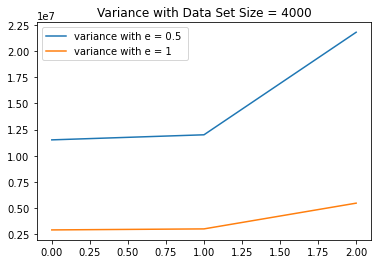

In [129]:
plt.plot(variance_4k_e05, label='variance with e = 0.5 ')
plt.plot(variance_4k_e1, label='variance with e = 1')
plt.title('Variance with Data Set Size = 4000')
plt.legend()
plt.show()